## Data Preparation English
output: dataframe with catagories, speaker_id and data_path

In [10]:
# dependecies
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
# Define the dataset directory
savee_path = r"..\Data\English"


# Mapping SAVEE filename encoding to emotions 
emotion_map = {
    'a': 'anger',
    'su': 'surprise',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happiness',
    'sa': 'sadness',
    'n': 'neutral'
}

data = []
speaker_id = 0
for speaker in os.listdir(savee_path):
    speaker_path = os.path.join(savee_path, speaker)
    if os.path.isdir(speaker_path):
        speaker_id += 1
        for filename in os.listdir(speaker_path):
            file_path = os.path.join(speaker_path, filename)
            if os.path.isfile(file_path) and re.match(r"^[a-z]+\d{2}.wav", filename):
                emotion = emotion_map[re.findall("[a-zA-Z]+", filename)[0]]
                data.append([file_path, emotion, speaker_id])



In [12]:
# Create a DataFrame
df = pd.DataFrame(data, columns= ['filename', 'emotion', 'speaker_id'])
df.head()

,filename,emotion,speaker_id
0,..\Data\English\DC\a01.wav,anger,2
1,..\Data\English\DC\a02.wav,anger,2
2,..\Data\English\DC\a03.wav,anger,2
3,..\Data\English\DC\a04.wav,anger,2
4,..\Data\English\DC\a05.wav,anger,2


In [13]:
# counts of speakers
df["speaker_id"].nunique()

4

In [14]:
# speaker distribution
speaker_distribution = df["speaker_id"].value_counts()
speaker_distribution


speaker_id
2    120
3    120
4    120
5    120
Name: count, dtype: int64

We have 10 speakers and the speaker distribution looks good as they all have a similar amount of audio files.

In [15]:
# Count occurrences of each emotion
emotion_counts = df['emotion'].value_counts()
emotion_counts

emotion
neutral      120
disgust       60
anger         60
fear          60
happiness     60
sadness       60
surprise      60
Name: count, dtype: int64

C:\Users\Julia\AppData\Local\Temp\ipykernel_4760\19157682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


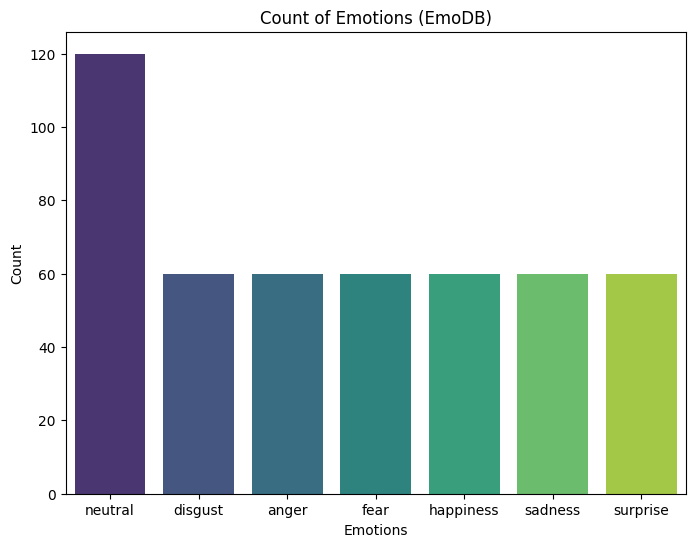

In [16]:
# plot distribution of emotions
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Count of Emotions (EmoDB)")
plt.show()

In [ ]:
# Encoding labels to 0 and 1
# Mapping dictionary
# positive: 1
# negative: 0
valence_map = {
    'anger': 0,
    'surprise': 1,
    'disgust': 0,
    'fear': 0,
    'happiness': 1,
    'sadness': 0,
    'neutral': 1
}

# Map emotions to Positive/Negative
df['valence'] = df['emotion'].map(valence_map)

In [18]:
# save the data as csv
df.to_csv("../Data/English/data_path_english.csv",index=False)
df.head()

,filename,emotion,speaker_id,valence
0,..\Data\English\DC\a01.wav,anger,2,0
1,..\Data\English\DC\a02.wav,anger,2,0
2,..\Data\English\DC\a03.wav,anger,2,0
3,..\Data\English\DC\a04.wav,anger,2,0
4,..\Data\English\DC\a05.wav,anger,2,0
